# Stratified_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

Rozważmy zbiór Wine

In [7]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
# print(wine.DESCR)

In [8]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

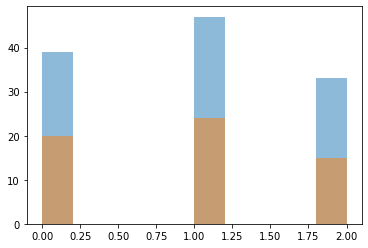

In [11]:
from sklearn.model_selection import train_test_split
mms = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(mms.fit_transform(X), y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [12]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

c:\users\przem\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 10, 'gamma': 0.1}

In [18]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [19]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

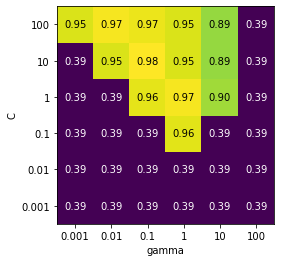

In [20]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [22]:
grid_2 = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_


{'C': 0.1, 'gamma': 1}

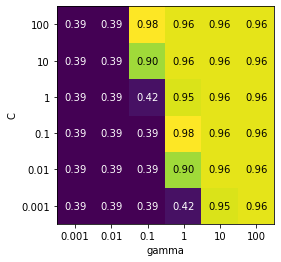

In [26]:
results2 = pd.DataFrame(grid_2.cv_results_)
scores2 = np.array(results2.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores2, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [27]:
grid_3 = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'C': 10, 'gamma': 0.001}

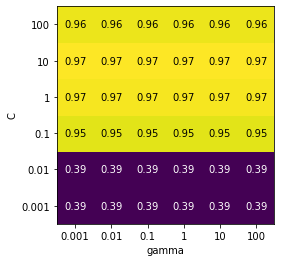

In [28]:
results3 = pd.DataFrame(grid_3.cv_results_)
scores3 = np.array(results3.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores3, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [30]:
log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_4 = GridSearchCV(LogisticRegression(), log_reg_param_grid, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'C': 10}

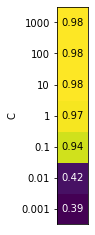

In [31]:
results4 = pd.DataFrame(grid_4.cv_results_)

scores4 = np.array(results4.mean_test_score).reshape(7,1)
# plot the mean cross-validation scores
heatmap(scores4, xlabel='', xticklabels=[], ylabel='C', yticklabels=log_reg_param_grid['C'], cmap="viridis")
plt.show()

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

In [40]:
from sklearn import metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('LogisticRegression', grid_4.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted')))
    print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test), average='weighted')))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted')))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.9841101694915254
recall_score: 0.9830508474576272
f1_score: 0.9831439107523005
accuracy_score: 0.9830508474576272
SVM poly
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
SVM linear
R^2: 0.9841101694915254
recall_score: 0.9830508474576272
f1_score: 0.9831439107523005
accuracy_score: 0.9830508474576272
LogisticRegression
R^2: 0.9841101694915254
recall_score: 0.9830508474576272
f1_score: 0.9831439107523005
accuracy_score: 0.9830508474576272


In [41]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=[model[0] for model in models])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.98411,0.983051,0.983144,0.983051
1,SVM poly,1.00000,1.000000,1.000000,1.000000
2,SVM linear,0.98411,0.983051,0.983144,0.983051
3,LogisticRegression,0.98411,0.983051,0.983144,0.983051
